In [1]:
import pandas as pd

data = pd.read_csv('Housing.csv')
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


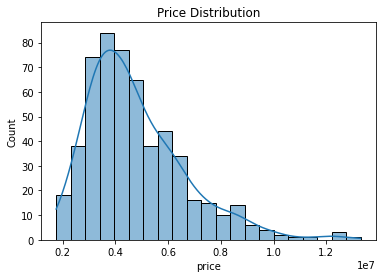

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


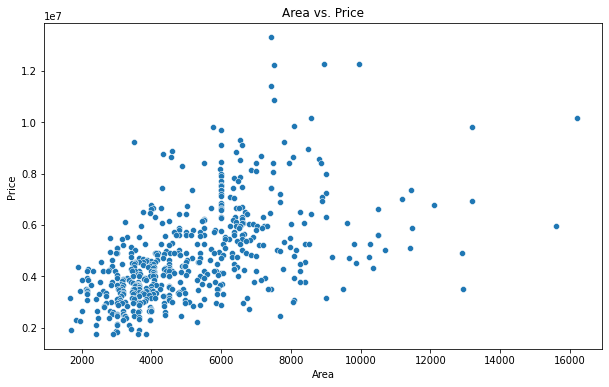

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['area'], data['price'])
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

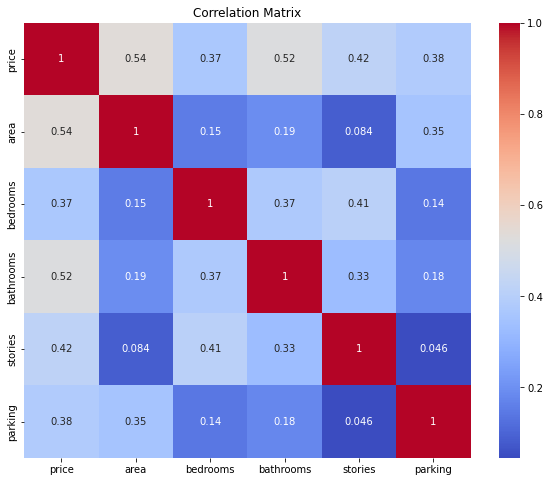

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms']

statistics = data[numerical_cols].describe()
print(statistics)

              price          area    bedrooms   bathrooms
count  5.450000e+02    545.000000  545.000000  545.000000
mean   4.766729e+06   5150.541284    2.965138    1.286239
std    1.870440e+06   2170.141023    0.738064    0.502470
min    1.750000e+06   1650.000000    1.000000    1.000000
25%    3.430000e+06   3600.000000    2.000000    1.000000
50%    4.340000e+06   4600.000000    3.000000    1.000000
75%    5.740000e+06   6360.000000    3.000000    2.000000
max    1.330000e+07  16200.000000    6.000000    4.000000


In [12]:
missing_values = data.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [13]:
#so the dataset has no missing values

In [15]:
def replace_outliers(column):

    z_scores = (column - column.mean()) / column.std()
   
    threshold = 3
    
   
    column[z_scores.abs() > threshold] = column.median()
    
    return column


numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms']
data[numerical_cols] = data[numerical_cols].apply(replace_outliers)


print(data.head())

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  4340000  7420         4          2        3      yes        no       no   
1  4340000  8960         4          1        4      yes        no       no   
2  4340000  9960         3          2        2      yes        no      yes   
3  4340000  7500         4          2        2      yes        no      yes   
4  4340000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


In [16]:
from sklearn.preprocessing import LabelEncoder



categorical_cols = data.select_dtypes(include='object').columns

for column in categorical_cols:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])


print(data.head())

     price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  4340000  7420         4          2        3         1          0         0   
1  4340000  8960         4          1        4         1          0         0   
2  4340000  9960         3          2        2         1          0         1   
3  4340000  7500         4          2        2         1          0         1   
4  4340000  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  furnishingstatus  
0                0                1        2                 0  
1                0                1        3                 0  
2                0                0        2                 1  
3                0                1        3                 0  
4                0                1        2                 0  


In [17]:
X = data.drop('price', axis=1)  # Independent variables (features)
y = data['price']  # Dependent variable (target)



Independent variables (X) shape: (545, 11)
Dependent variable (y) shape: (545,)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.237672  1.464768   1.760041  1.378217  0.405623  -0.465315 -0.734539   
1  2.036247  1.464768  -0.568169  2.532024  0.405623  -0.465315 -0.734539   
2  2.554802  0.064244   1.760041  0.224410  0.405623  -0.465315  1.361397   
3  1.279156  1.464768   1.760041  0.224410  0.405623  -0.465315  1.361397   
4  1.237672  1.464768  -0.568169  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  furnishingstatus  
0        -0.219265         1.472618  1.517692         -1.406286  
1        -0.219265         1.472618  2.679409         -1.406286  
2        -0.219265        -0.679063  1.517692         -0.091662  
3        -0.219265         1.472618  2.679409         -1.406286  
4        -0.219265         1.472618  1.517692         -1.406286  


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (436, 11)
X_test shape: (109, 11)
y_train shape: (436,)
y_test shape: (109,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1853752057610.1924
